## <center><strong>Importing the <span style= 'color: #F87060'>Packeges</span>

In [21]:
import matplotlib

import numpy              as np
import pandas             as pd
import seaborn            as sns
import polars             as pl
import matplotlib.pyplot  as plt

In [22]:
%matplotlib inline
plt.rcParams['font.family'] = 'Yu Gothic'


COLORS          : list = ['#102542', '#F87060', '#CDD7D6', '#B3A394', '#FFFFFF']
FONT            : int  = 20
PAD             : int  = 40

## <center><strong>Data reading & basic <span style= 'color: #F87060'> Exploring

In [35]:
df = pd.read_csv('../dataset/Loan dataset.csv')

cm = sns.light_palette(COLORS[1], as_cmap=True)
df.sample(5).style.background_gradient(cm)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
345,LP002129,Male,Yes,0,Graduate,No,2499,2458.000000,160.000000,360.000000,1.000000,Semiurban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y
517,LP002682,Male,Yes,nan,Not Graduate,No,3074,1800.000000,123.000000,360.000000,0.000000,Semiurban,N
424,LP002364,Male,Yes,0,Graduate,No,14880,0.000000,96.000000,360.000000,1.000000,Semiurban,Y
595,LP002940,Male,No,0,Not Graduate,No,3833,0.000000,110.000000,360.000000,1.000000,Rural,Y


In [36]:
df.sample(5).style.highlight_null(COLORS[0])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
384,LP002236,Male,Yes,2,Graduate,No,4566,0.000000,100.000000,360.000000,1.000000,Urban,N
429,LP002370,Male,No,0,Not Graduate,No,2717,0.000000,60.000000,180.000000,1.000000,Urban,Y
408,LP002315,Male,Yes,1,Graduate,No,8300,0.000000,152.000000,300.000000,0.000000,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.000000,99.000000,360.000000,nan,Semiurban,Y
11,LP001027,Male,Yes,2,Graduate,nan,2500,1840.000000,109.000000,360.000000,1.000000,Urban,Y


In [37]:
cm = sns.light_palette(COLORS[3], as_cmap=True)
df.describe().style.background_gradient(cm)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.000000,564.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,85.587325,65.120410,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## <center><strong>Visualizing data <span style= 'color: #F87060'> Issues

In [38]:
def add_bar_labels(x,y, ax, scaler= 0):
    for i in range(len(x)):
        ax.text(i, y[i] + scaler , '{:,}'.format(y[i]), ha = 'center')

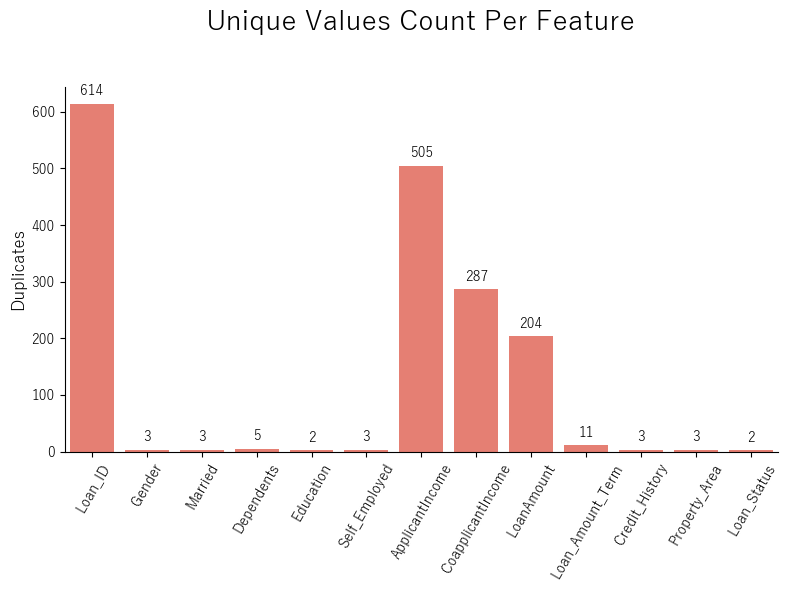

In [39]:
loans_duplicates = df.apply(lambda x: x.duplicated().sum())

fig, ax = plt.subplots()
sns.barplot(x= loans_duplicates.index, y= len(df) - loans_duplicates.values, color= COLORS[1], ax= ax)


add_bar_labels(loans_duplicates.index,    len(df) - loans_duplicates.values, ax, scaler= 15)

ax.set_title('Unique Values Count Per Feature'  ,fontsize= FONT, pad= PAD)
ax.set_ylabel('Duplicates'                      ,fontsize= FONT * 3/5)

plt.sca(ax)
plt.xticks(rotation=60)

ax.spines[['right', 'top']].set_visible(False)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.set_size_inches(8, 6)
plt.tight_layout()
plt.show()

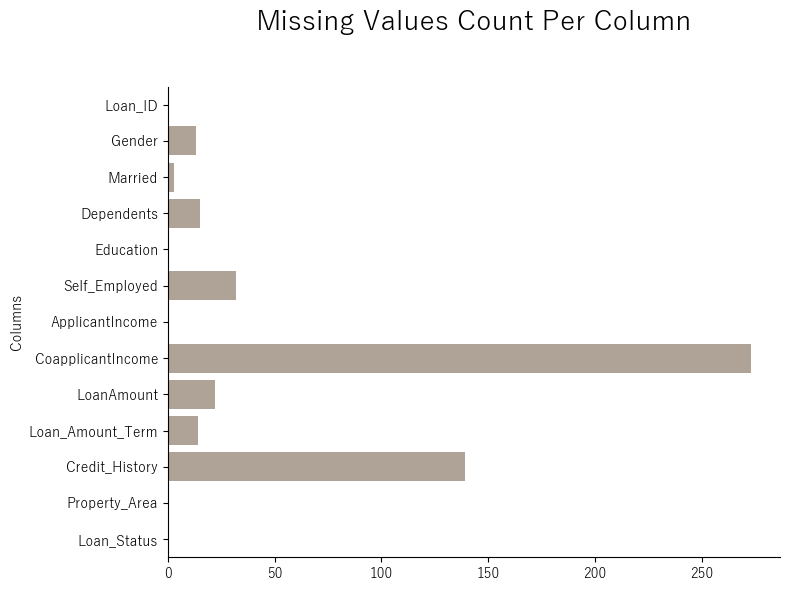

In [41]:
fig, ax = plt.subplots()

null_count = []

for col in df.columns:
    null_count.append(df[col].isnull().sum() + (df[col] == 0).sum())


sns.barplot(x= null_count, y= df.columns,
            color= COLORS[3])

plt.sca(ax)
plt.ylabel('Columns')
sns.despine()

ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))


ax.set_title('Missing Values Count Per Column', fontsize=FONT, pad= PAD)

fig.set_size_inches(8, 6)
plt.tight_layout()
plt.show()

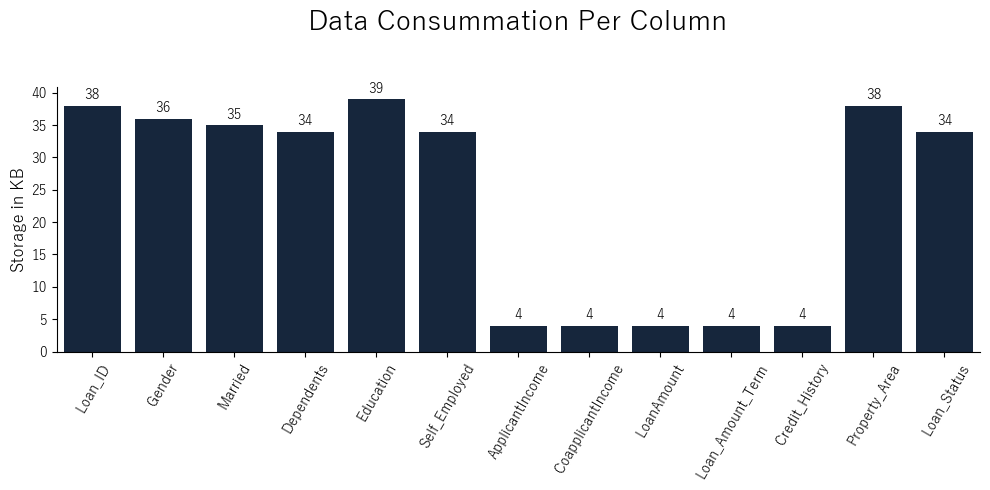

In [42]:
fig, ax = plt.subplots()


data_consumation  = df.memory_usage(index=False, deep=True).values // 1024
cols              = df.memory_usage(index=False, deep=True).index

sns.barplot(x= cols, y= data_consumation, color= COLORS[0],  ax= ax)
add_bar_labels(cols, data_consumation, ax, scaler= 1)


plt.sca(ax)
sns.despine()

ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.spines['right'] .set_visible(False)
ax.spines['top']   .set_visible(False)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(cols, rotation=60)

ax.set_ylabel('Storage in KB', fontsize= FONT * 3/5)
ax.set_title('Data Consummation Per Column', fontsize= FONT, pad= PAD)

fig.set_size_inches(10, 5)

plt.tight_layout()
plt.show()

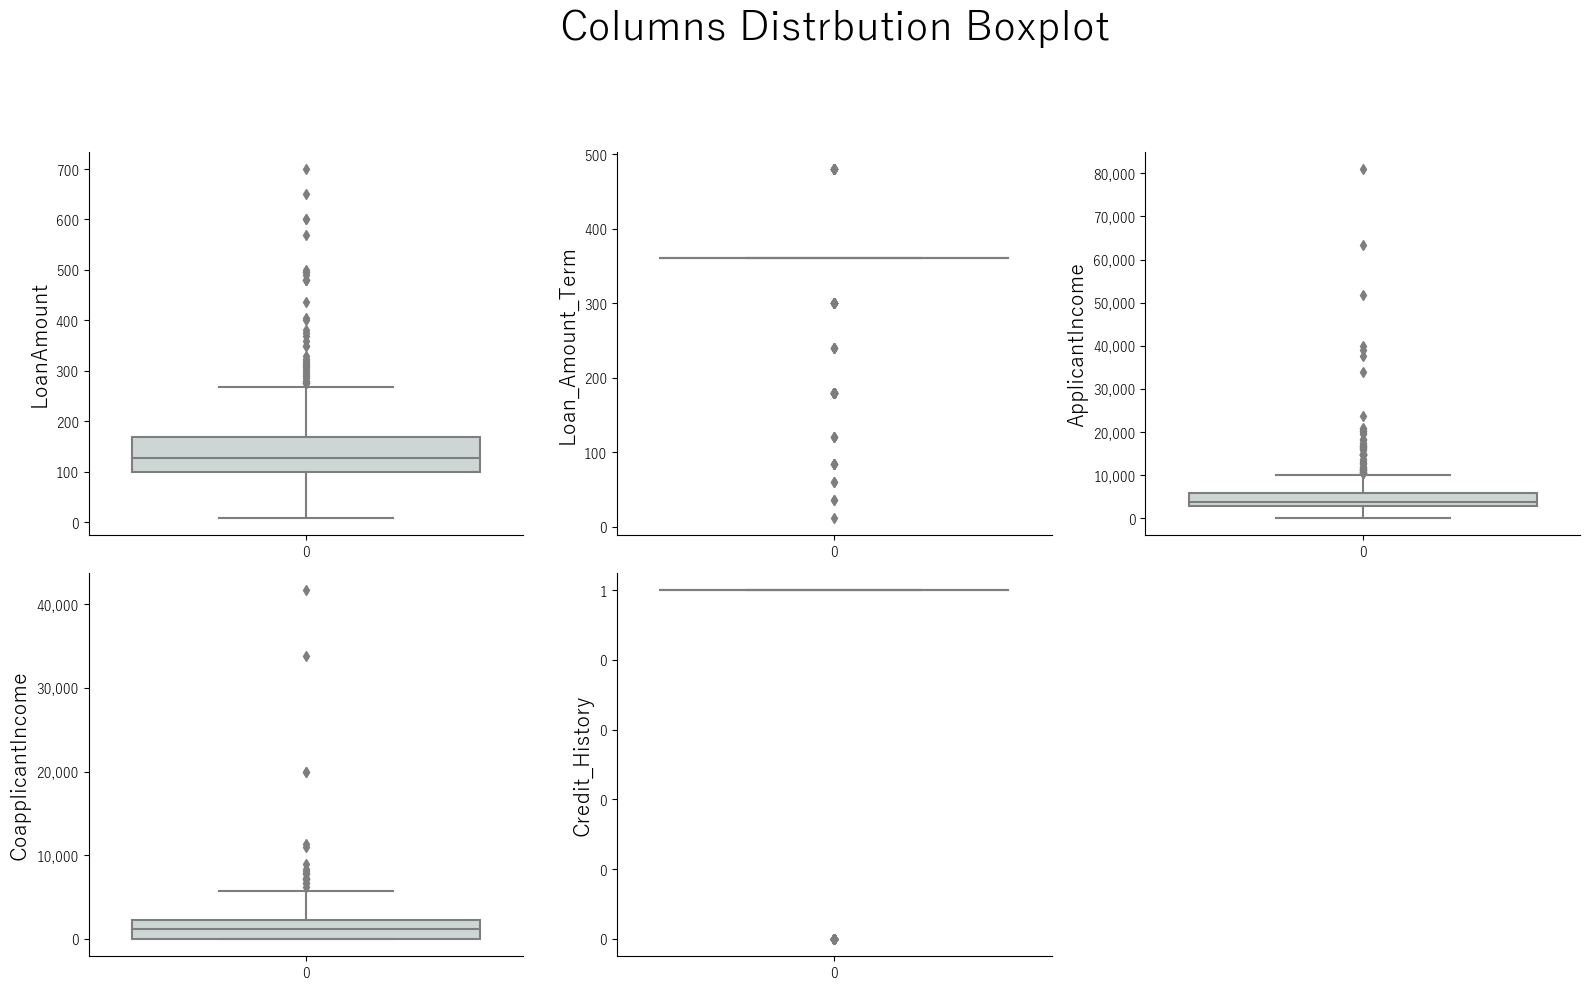

In [86]:
fig, axes = plt.subplots(nrows= 2, ncols= 3)
axes_ = [axes[0, 0], axes[0, 1], axes[0, 2], axes[1, 0], axes[1, 1], axes[1, 2]]

chart_data = df[['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome',
                'CoapplicantIncome', 'Credit_History']]

for ax, col in zip(axes_, chart_data.columns):

    sns.boxplot(data= chart_data[col], palette= [COLORS[2]], ax=ax)
    
    ax.set_ylabel(col, fontsize= FONT / 1.3)
    # ax.set_title('Outliers Per Movies Features', fontsize= FONT, pad= PAD)
    
    ax.spines['right']      .set_visible(False)
    ax.spines['top']        .set_visible(False)
    
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

axes[0, 1].set_title('Columns Distrbution Boxplot', fontsize= FONT*1.5, pad= PAD*2)
axes[1, 2].axis('off')

fig.set_size_inches(16, 10)

plt.tight_layout()
plt.show()

## <center><strong>Founded data <span style= 'color: #F87060'>Issues

#### Our Data Issues:
- The missing values in every column
- The unoptimized numrical dtypes
- The very limited amount of data
- The outliers
- Hard to understand column names